# Make moons dataset
In this Notebook we will go through the process of getting the Neural Network to learn. We will apply the class we have created to a dataset called `make_moons` which is a popular toy dataset for binary classification. 

## Relevant Imports

In [48]:
# import numpy
import numpy as np
# import the NN classifier
from classifier_NN import ClassifierNN
# Import the make_moons dataset
from sklearn.datasets import make_moons
# import the train_test_split function
from sklearn.model_selection import train_test_split
# import matplotlib for plotting
import matplotlib.pyplot as plt

## Preprocess the dataset

In [15]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

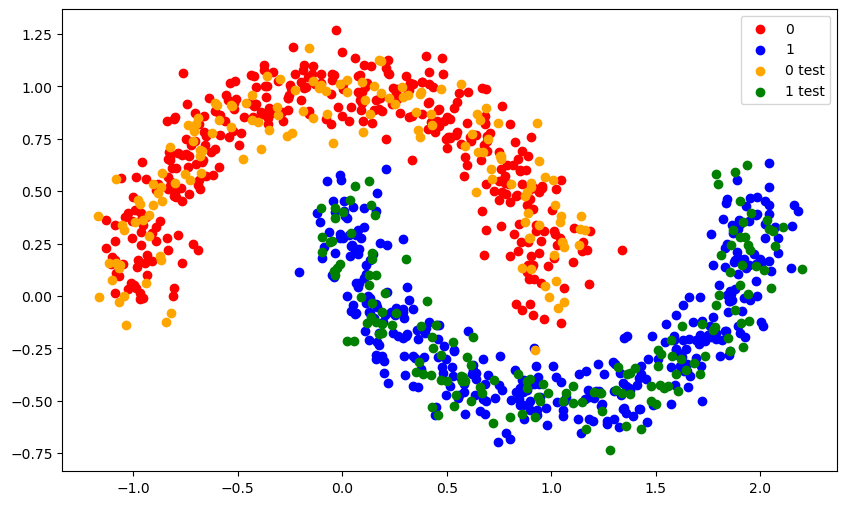

In [17]:
# plot the training and test data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='0 test')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='1 test')
plt.legend()
plt.show()

In [18]:
# the data needs to be in the form (n_features, n_samples)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

## Configure the Neural Network
- we will use a Neural Network with 2 hidden layers and an output layer 
    - the first hidden layer will have 4 neurons
    - the second hidden layer will have 3 neurons
    - the output layer will have 1 neuron
- we will use the relu activation function for the hidden layers and the sigmoid activation function for the output layer

In [35]:
classifier = ClassifierNN(layer_dims=[X_train.shape[0], 4, 3, 1], activations=['relu', 'relu', 'sigmoid'])

## Train the Neural Network
- we have a variety of hyperparameters to tune during training 
    - the `learning_rate`: we will choose 0.01
    = the `num_epochs`: we will train the model for 100 epochs
    - the `batch_size`: we will use a batch size of 64 which is the default value
    - `lambd`: we will not use L2 regularization
    - `keep_prob`: we will not use dropout regularization
    - `loss`: we will use the binary cross entropy loss function because this is a binary classification problem
    - `optimizer`: we will use the Adam optimizer
        - we will use the default values for the optimizer's hyperparameters `beta1` and `beta2`

In [36]:
params, costs = classifier.train(X_train, y_train, learning_rate=0.01, num_epochs=200, print_cost=True, loss='BinaryCrossEntropy', optimizer='adam')

Cost after iteration 0: 0.7070656577366529


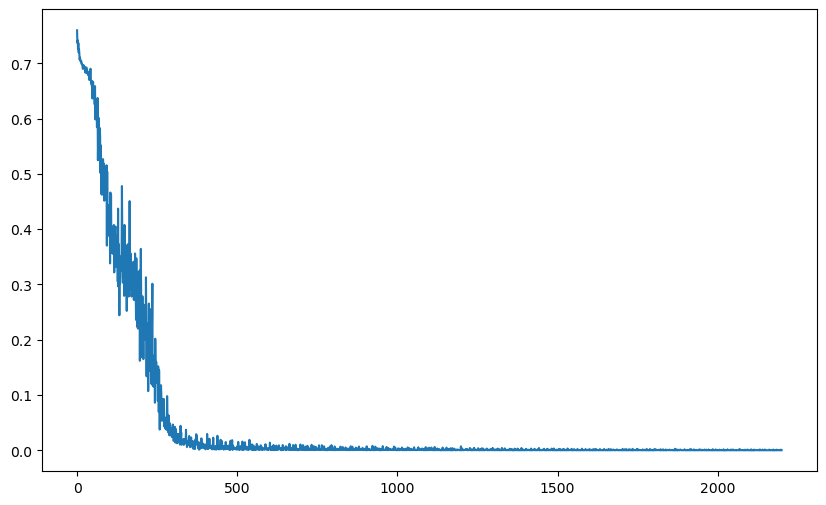

In [37]:
# plot the cost
plt.figure(figsize=(10, 6))
plt.plot(costs)

## Evaluate the Performance of the Neural Network

In [38]:
classifier.accuracy(X_train, y_train)

1.0

In [39]:
classifier.accuracy(X_test, y_test)

0.9933333333333333

## Plot the Decision Boundary

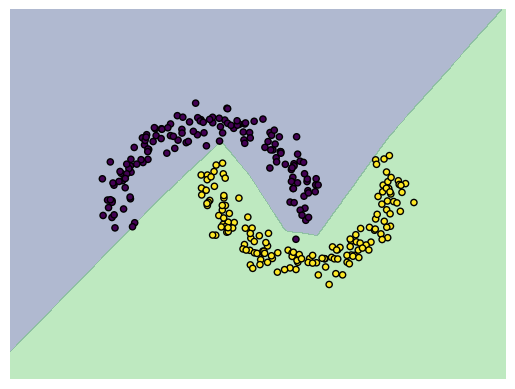

In [47]:
# plot the decision boundary using matplotlib
def plot_decision_boundary(X, y, classifier):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[0, :], X[1, :], c=y, s=20, edgecolor='k')
    plt.axis('off')
    plt.show()

plot_decision_boundary(X_test, y_test, classifier)